# 2. 데이터 재단하기 Filtering df
- 학습에 방해가 될 가능성이 존재하는 text는 제거한다
1. 필요 이상으로 긴 글은 목적이 다른 글일 가능성이 크므로 제거한다 ex) 기사
- 길이 분포를 파악하고, 기준을 세우자.
2. 링크가 포함된 글도 제거하자
3. 댓글이 없는 본문, 본문이 없는 댓글은 제거한다.
4. 파일로 저장

## 2-a. 파일 불러오기

In [1]:
import pandas as pd
file_name = "1_id_text.csv"
df = pd.read_csv(file_name, encoding="utf-8")
df.head(3)

,search_keyword,date_created,time_created,writer,is_reply,text,id
0,JYP,2023-06-13,12:50:42,ㅇㅇ,0,jyp가반년만에2배가올랏네 근디보니는인적자원위주로하는사업은먼가ㅂㄹ다걍제조업이조음..,10100746844
1,JYP,2023-05-16,17:52:40,ㅇㅇ(118.34),0,야 개보지년들아 JYP 주가 봤냐.. 미쳣다 지금... 개잡주 오르는건 그러려니 하...,10100730087
2,JYP,2023-05-16,17:52:48,ㅇㅇ(118.34),1,ㅠㅠ,10100730087


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153474 entries, 0 to 1153473
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1153474 non-null  object
 1   date_created    1153474 non-null  object
 2   time_created    1153474 non-null  object
 3   writer          1153474 non-null  object
 4   is_reply        1153474 non-null  int64 
 5   text            1153474 non-null  object
 6   id              1153474 non-null  int64 
 7   text_length     1153474 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 70.4+ MB


## 2-b. 목적에 맞지 않는 글 제거
- 링크가 들어간 글은 제거한다 (http 가 들어간 row 제거)
- 기사이거나, 광고목적의 글이 많기 때문이다

In [8]:
df_cleaned = df[~df['text'].str.contains('http')]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1147246 entries, 0 to 1153473
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1147246 non-null  object
 1   date_created    1147246 non-null  object
 2   time_created    1147246 non-null  object
 3   writer          1147246 non-null  object
 4   is_reply        1147246 non-null  int64 
 5   text            1147246 non-null  object
 6   id              1147246 non-null  int64 
 7   text_length     1147246 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 78.8+ MB


## 2-c. text 길이 분포 시각화
- 어디서 잘라야 할지 판단하기 위해 text 길이 분포를 시각화한다

### 2-c-1. 길이분포 시각화 함수

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 함수화
def analyze_text_length(df, column_name):
    df_copy = df.copy()
    df_copy['text_length'] = df_copy[column_name].apply(len)
    plt.figure(figsize=(10, 6))
    plt.hist(df_copy['text_length'], bins=20, log=True)
    plt.xlabel('Text Length')
    plt.ylabel('Frequency (log scale)')
    plt.title('Distribution of Text Length')
    plt.show()
    percentiles = [99.95, 99.9, 99.5, 99, 98.5, 98, 97, 96]
    percentile_values = np.percentile(df_copy['text_length'], percentiles)
    return dict(zip(percentiles, percentile_values))

### 2-c-2. 본문의 길이분포 시각화

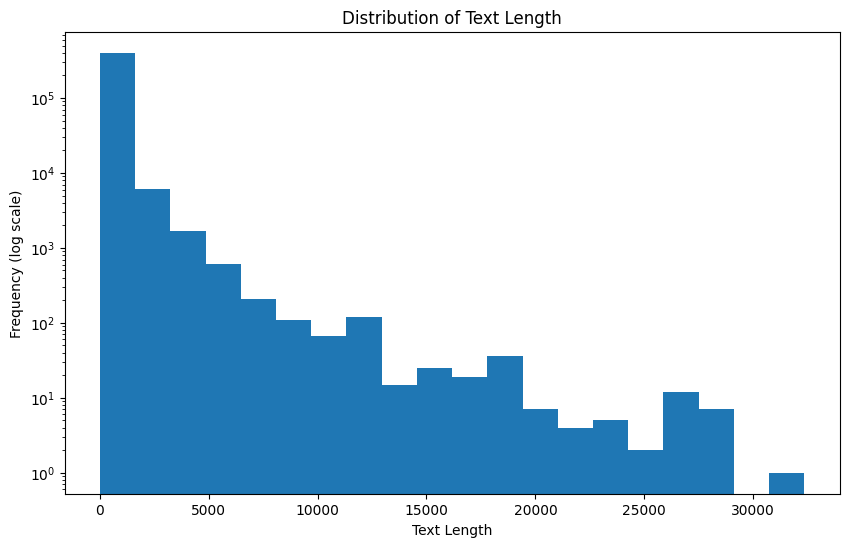

{99.9: 8159.0,
 99.5: 3816.0,
 99: 2693.0,
 98.5: 2104.0,
 98: 1747.0,
 97: 1221.0,
 96: 883.0}

In [25]:
df_0 = df[df['is_reply'] == 0]
dict_0 = analyze_text_length(df_0, 'text')
dict_0

In [42]:
n = 883.0
df_length_0 = df_0[df_0['text'].apply(len) >= n]
df_length_0

,search_keyword,date_created,time_created,writer,is_reply,text,id,text_length
12,JYP,2023-04-15,18:04:36,ㅇㅇ(218.55),0,JYP는 신 맞다 (300%인증) 컄ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ컄ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,10100713453,1239
86,JYP,2021-11-29,00:43:37,봉말숙,0,메타버스 ETF'로 맞붙은 삼성·미래운용 미래 수익률 35.92%로 1위…순자산은...,10200010692,1191
109,JYP,2021-05-07,19:24:24,쿠팡매매법,0,5/7 대차 체결과 상환 삼중 죽어보자는 뜻두중 lg디플 여전히 대차 계속 쌓는 중...,10300072663,1442
120,JYP,2021-04-12,15:05:06,ㆀ(211.47),0,코스닥 대차거래 잔고감소 상위 20종목 순위 종목명 체결(주수) 상환(주수) 잔고증...,10300067542,1123
131,JYP,2020-12-06,03:08:31,도토루,0,주린이 수급매매 빠다망고형 수급글 읽고 평소 써오던 수급매매법 정리할겸 써봄나는 차...,10300037136,1028
...,...,...,...,...,...,...,...,...
1153287,휴젤,2020-10-29,17:36:01,0000(165.246),0,대폭락의 전조들. 코스피 0.8% 하락…기관·외국인 대량 매도(종합) 코스피 하락 ...,241100902026,1753
1153303,휴젤,2020-10-22,17:56:30,ㅇㅇ,0,1022 특징주 1. 개요KOSPI 2 355.05(-0.67%)KOSDAQ 812...,241100877984,7802
1153427,휴젤,2020-05-04,10:37:47,News,0,"국산1호 보톡스 메디톡신 허가취소기로…회사 ""일자리창출기여해 무허가 원액으로 제품을...",241100060063,1897
1153433,휴젤,2022-01-24,18:01:47,코스피1500,0,"사모펀드 "" 오스템 경영진이랑 티타임이라도.. "" ""오스템임플란트 경영진 연락처좀 ...",241200577040,1917


- 보통 기사 text가 1000자가 넘어간다
- 상위 4%인 883자 이상인 text를 제거하기로 결정한다
- length_threshold_0 = 883

### 2-c-3. 원본 df에 적용하기 : 길이가 긴 본문 row 없애기 

In [44]:
length_threshold_0 = 883

df_removed = df[~((df['is_reply'] == 0) & (df['text'].apply(len) >= length_threshold_0))]

df_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1137002 entries, 0 to 1153473
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1137002 non-null  object
 1   date_created    1137002 non-null  object
 2   time_created    1137002 non-null  object
 3   writer          1137002 non-null  object
 4   is_reply        1137002 non-null  int64 
 5   text            1137002 non-null  object
 6   id              1137002 non-null  int64 
 7   text_length     1137002 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 78.1+ MB


In [45]:
1147246 - 1137002 
# 10244 개의 row 제거됨

10244

### 2-c-4. 댓글의 길이분포 시각화

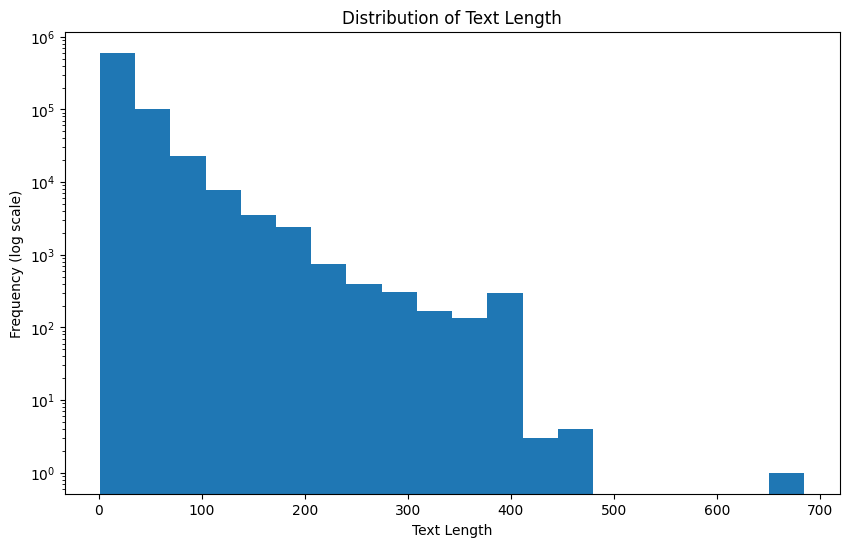

{99.95: 359.00800000003073,
 99.9: 292.0,
 99.5: 182.0,
 99: 142.0,
 98.5: 120.0,
 98: 106.0,
 97: 89.0,
 96: 78.0}

In [31]:
df_1 = df[df['is_reply'] == 1]
dict_1 = analyze_text_length(df_1, 'text')
dict_1

In [36]:
n = 400
df_length_1 = df_1[df_1['text'].apply(len) >= n]
df_length_1

,search_keyword,date_created,time_created,writer,is_reply,text,id,text_length
87004,기아,2023-05-20,10:23:55,ㅇㅇ(172.225),1,뭐 사실 한국만 그러는거 아니긴하다. 전세계가 지금 경제 답없어서 통계주작질로 눈...,41606092544,400
91565,기아,2020-01-14,18:06:53,ㅇㅇ(89.159),1,대가리 씹 좆 빠가라 한마디 더 한다. ㅋㅋㅋ 니가 그래 쳐 빠는 벤츠 클라스 a에...,41602607008,400
99053,기아,2008-05-05,18:38:22,...........(123.212),1,159.149/\'검사하는 미국소\'라.....ㅍㅎㅎ미쿡님하들이 전수 검사라도 한답...,41600097977,401
109420,기아,2021-02-06,14:52:56,ㅇㅇ(221.149),1,자율주행 + 전기차 현기밖에 없곸ㅋㅋㅋ 일본은 전기차 못만들곸ㅋㅋㅋ 전기차를 못만드...,40800714542,400
126876,넷마블,2021-03-11,02:36:47,ㅇㅇ(114.206),1,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,50600887651,400
...,...,...,...,...,...,...,...,...
1124329,현대차,2021-01-15,18:39:31,ㅇㅇ(112.163),1,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,231101188458,400
1124330,현대차,2021-01-15,18:39:33,ㅇㅇ(112.163),1,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,231101188458,400
1131600,현대차,2020-09-10,09:01:45,ㅇㅇ(39.7),1,대부분 맞긴한데 일부는 틀림. 현재 생산되는 부산물 수소는 상용화 하기엔 터무니없...,231100714115,413
1141282,현대차,2021-02-27,01:07:28,ㅇㅇ(39.127),1,고수와 하수의 차이? ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ고수와 하수의 차이?...,231403000102,400


- 댓글 text는 목적에 부합하므로 길이를 기준으로 drop하지 않고, 전부 보존한다

### 2-c-5. 댓글이 없는 본문 row 제거

In [50]:
df_filtered_0 = df_removed.groupby('id').filter(lambda x: not x['is_reply'].eq(0).all())
df_filtered_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950809 entries, 1 to 1153473
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   search_keyword  950809 non-null  object
 1   date_created    950809 non-null  object
 2   time_created    950809 non-null  object
 3   writer          950809 non-null  object
 4   is_reply        950809 non-null  int64 
 5   text            950809 non-null  object
 6   id              950809 non-null  int64 
 7   text_length     950809 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 65.3+ MB


### 2-c-6. 본문이 없는 댓글 row 제거

In [51]:
# id별로 그룹화하여 각 그룹 내에서 'is_reply'가 1인 row만 있는 그룹을 제거
df_filtered_1 = df_filtered_0.groupby('id').filter(lambda x: not x['is_reply'].eq(1).all())
df_filtered_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891014 entries, 1 to 1153473
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   search_keyword  891014 non-null  object
 1   date_created    891014 non-null  object
 2   time_created    891014 non-null  object
 3   writer          891014 non-null  object
 4   is_reply        891014 non-null  int64 
 5   text            891014 non-null  object
 6   id              891014 non-null  int64 
 7   text_length     891014 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 61.2+ MB


### 2-c-7. 파일로 저장

In [52]:
# .csv 파일로 저장
df_filtered_1.to_csv("2_filtered_text.csv", encoding='utf-8', index=False)

#### 결과 확인

In [53]:
import pandas as pd
file_name = "2_filtered_text.csv"
df = pd.read_csv(file_name, encoding="utf-8")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891014 entries, 0 to 891013
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   search_keyword  891014 non-null  object
 1   date_created    891014 non-null  object
 2   time_created    891014 non-null  object
 3   writer          891014 non-null  object
 4   is_reply        891014 non-null  int64 
 5   text            891014 non-null  object
 6   id              891014 non-null  int64 
 7   text_length     891014 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 54.4+ MB
